In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Airline_Delay_Cause.csv")
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,179338.000000,179338.000000,178997.000000,178747.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
mean,2019.480082,6.485725,327.816969,58.709086,18.572643,2.035742,17.094929,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410204,3.463516,931.001446,164.378035,47.389651,6.894812,56.279604,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,41.000000,6.000000,1.960000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,89.000000,15.000000,5.400000,0.220000,3.300000,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,218.000000,40.000000,14.700000,1.620000,9.860000,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [3]:
df = df[df['arr_flights'].notna() & (df['arr_flights'] != 0)]
df['arr_del15'] = df['arr_del15'].fillna(0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178997 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 178997 non-null  int64  
 1   month                178997 non-null  int64  
 2   carrier              178997 non-null  object 
 3   carrier_name         178997 non-null  object 
 4   airport              178997 non-null  object 
 5   airport_name         178997 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178997 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay            1

In [5]:
print("Unique years and flight counts:")
print(df['year'].value_counts().sort_index())
print("\nSummary statistics:")
print(df['year'].describe())

Unique years and flight counts:
year
2015    13516
2016    12198
2017    12508
2018    24928
2019    25828
2020    21735
2021    22763
2022    22947
2023    22574
Name: count, dtype: int64

Summary statistics:
count    178997.000000
mean       2019.479315
std           2.410860
min        2015.000000
25%        2018.000000
50%        2020.000000
75%        2022.000000
max        2023.000000
Name: year, dtype: float64


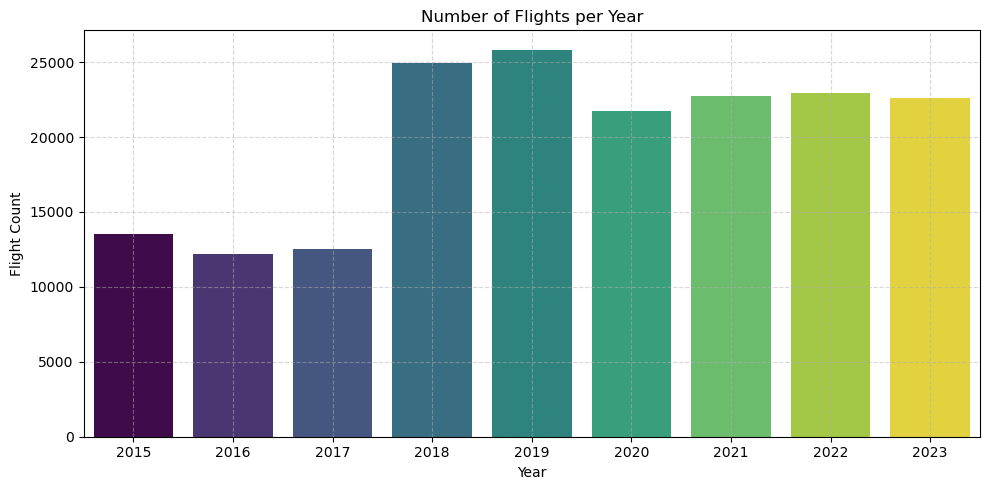

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year', hue='year', palette='viridis', legend=False)
plt.title('Number of Flights per Year')
plt.xlabel('Year')
plt.ylabel('Flight Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

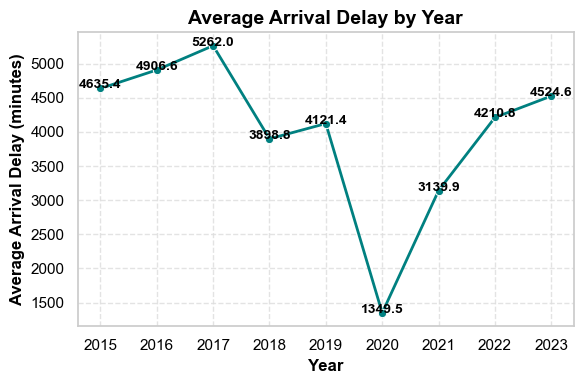

In [7]:
sns.set_theme(style="whitegrid")
avg_delay_per_year = df.groupby('year', as_index=False)['arr_delay'].mean()
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(
    data=avg_delay_per_year,
    x='year',
    y='arr_delay',
    marker='o',
    color='#008080',  
    linewidth=2,
    ax=ax
)
ax.set_title('Average Arrival Delay by Year', fontsize=14, weight='bold', color='black')
ax.set_xlabel('Year', fontsize=12, weight='bold', color='black')
ax.set_ylabel('Average Arrival Delay (minutes)', fontsize=12, weight='bold', color='black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')

for spine in ax.spines.values():
    spine.set_color('#cccccc')

ax.grid(True, linestyle='--', color='#dddddd', alpha=0.8)

for index, row in avg_delay_per_year.iterrows():
    ax.text(row['year'], row['arr_delay'] + 1, f"{row['arr_delay']:.1f}", 
            color='black', ha='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()


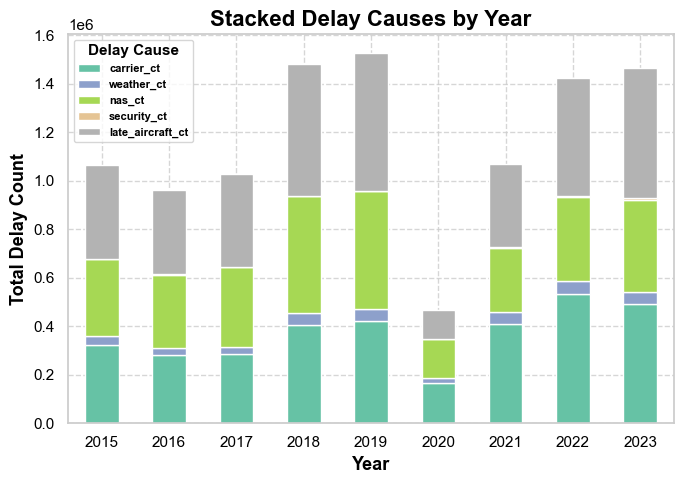

In [8]:
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
yearly_delays = df.groupby('year')[delay_causes].sum()

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(7, 5))
yearly_delays.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='Set2' 
)

ax.set_title('Stacked Delay Causes by Year', fontsize=16, weight='bold', color='black')
ax.set_xlabel('Year', fontsize=13, weight='bold', color='black')
ax.set_ylabel('Total Delay Count', fontsize=13, weight='bold', color='black')

ax.tick_params(axis='x', colors='black', labelrotation=0)
ax.tick_params(axis='y', colors='black')

ax.grid(True, linestyle='--', color='#cccccc', alpha=0.8)

legend = ax.legend(title='Delay Cause', fontsize=8, title_fontsize=11)
plt.setp(legend.get_texts(), color='black', weight='bold')
plt.setp(legend.get_title(), color='black', weight='bold')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#cccccc')

for spine in ax.spines.values():
    spine.set_color('#cccccc')

plt.tight_layout()
plt.show()


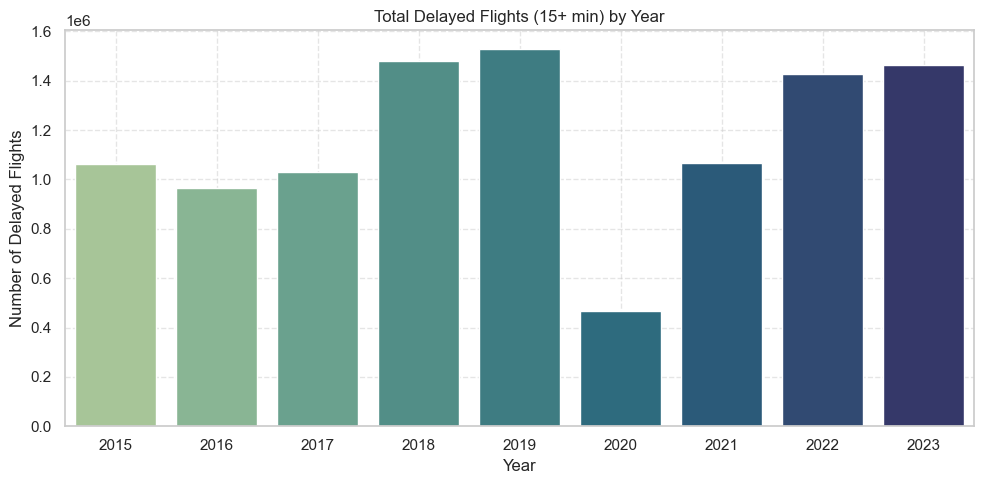

In [9]:
delayed_flights_by_year = df.groupby('year')['arr_del15'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=delayed_flights_by_year, x='year', y='arr_del15', hue='year', palette='crest', legend=False)
plt.title('Total Delayed Flights (15+ min) by Year')
plt.xlabel('Year')
plt.ylabel('Number of Delayed Flights')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


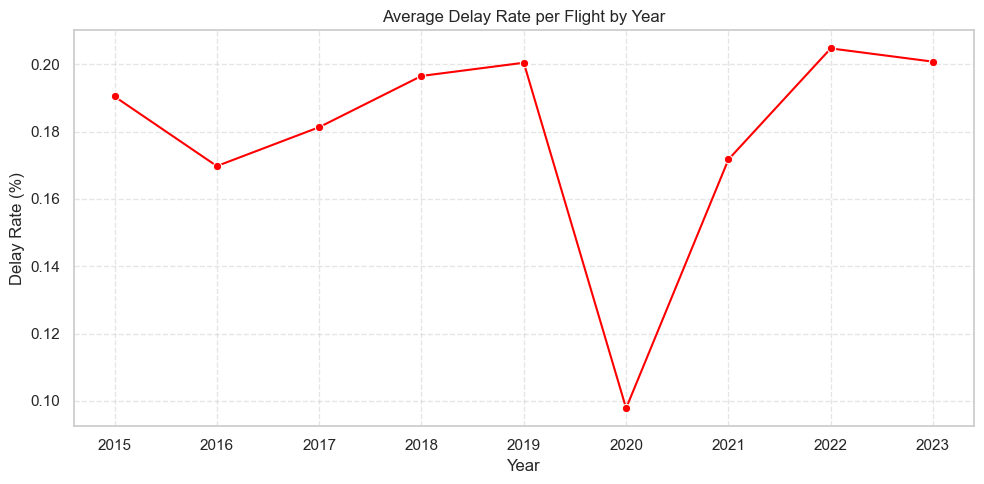

In [10]:
df['delay_rate'] = df['arr_del15'] / df['arr_flights']

delay_rate_by_year = df.groupby('year')['delay_rate'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=delay_rate_by_year, x='year', y='delay_rate', marker='o', color='red')
plt.title('Average Delay Rate per Flight by Year')
plt.xlabel('Year')
plt.ylabel('Delay Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


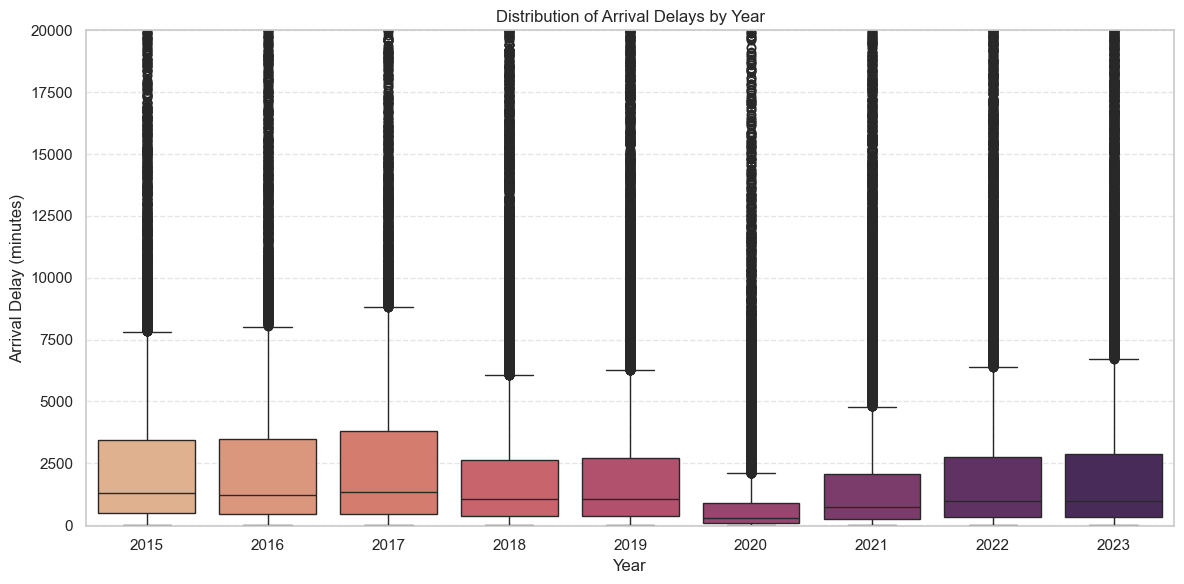

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='arr_delay', hue='year', palette='flare', legend=False)
plt.ylim(-50, 20000)  # You can adjust this range based on outliers
plt.title('Distribution of Arrival Delays by Year')
plt.xlabel('Year')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
print("Unique months and flight counts:")
print(df['month'].value_counts().sort_index())

flight_counts = df.groupby(['year', 'month']).size().unstack(fill_value=0)
print("Flight Counts per Month (across Years):")
print(flight_counts)

Unique months and flight counts:
month
1     15238
2     14977
3     15196
4     14832
5     14653
6     14936
7     14714
8     14868
9     14871
10    14788
11    14833
12    15091
Name: count, dtype: int64
Flight Counts per Month (across Years):
month    1     2     3     4     5     6     7     8     9     10    11    12
year                                                                         
2015   1174  1159  1154  1154  1140  1179  1086  1091  1091  1083  1097  1108
2016   1007   992  1003  1019  1009  1028  1019  1034  1021  1018  1025  1023
2017   1021  1022  1020  1044  1034  1071  1055  1072  1048  1033  1026  1062
2018   2081  2021  2037  2074  2003  2139  2060  2107  2054  2097  2109  2146
2019   2135  2088  2150  2090  2101  2210  2156  2215  2116  2160  2167  2240
2020   2202  2151  2190  1847  1692  1470  1673  1644  1716  1664  1699  1787
2021   1786  1737  1814  1815  1873  1975  1925  1952  1991  1995  1957  1943
2022   1931  1896  1937  1924  1925  1972  1872  

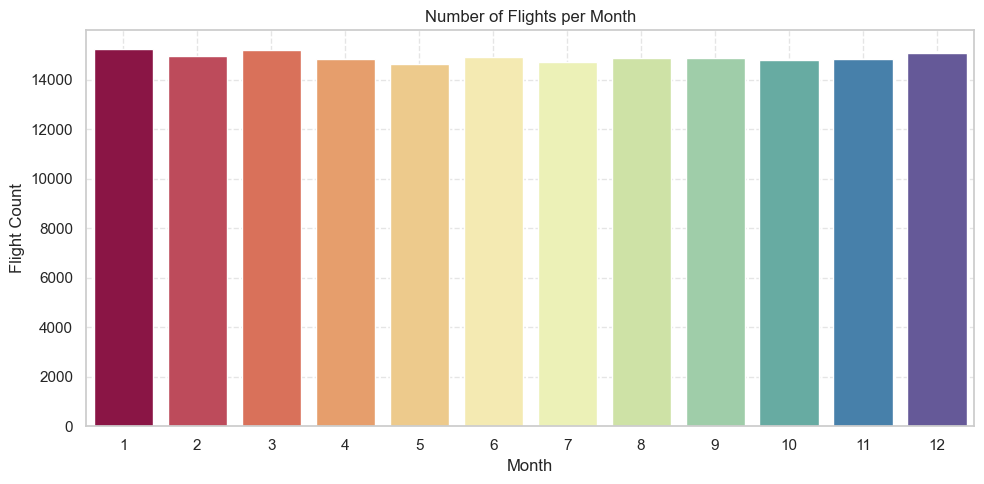

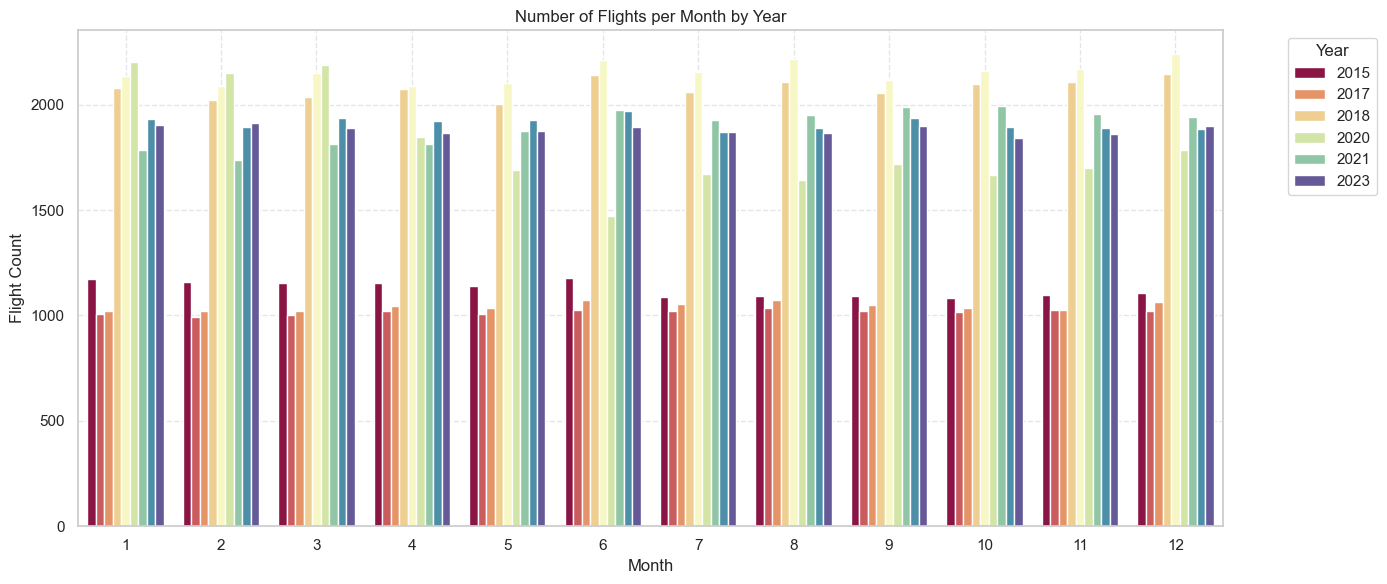

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='month', hue='month', palette='Spectral', legend=False)
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='month', hue='year', palette='Spectral')
plt.title('Number of Flights per Month by Year')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


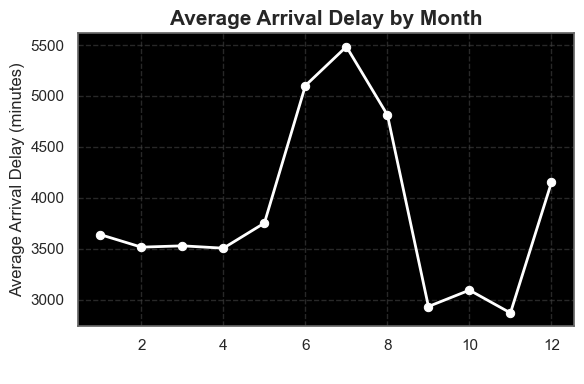

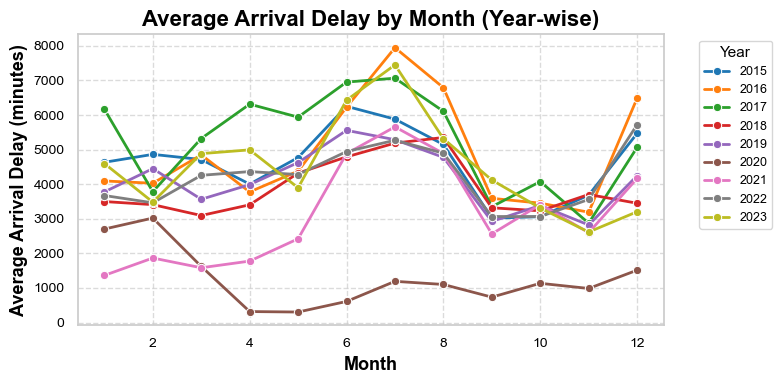

In [14]:
monthly_avg_delay = df.groupby('month')['arr_delay'].mean().reset_index()
plt.style.use('dark_background')
sns.set_style("darkgrid", {"axes.facecolor": "#000000"})  # pure black

plt.figure(figsize=(6, 4))
sns.lineplot(data=monthly_avg_delay, x='month', y='arr_delay', marker='o', color='white', linewidth=2)

plt.title('Average Arrival Delay by Month', fontsize=15, weight='bold')
plt.xlabel('Month', fontsize=12, color='white')
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)

plt.xticks()
plt.yticks()

plt.grid(True, linestyle='--', color='#444444', alpha=0.6)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('#666666')

plt.tight_layout()
plt.show()

monthly_avg_delay_yearwise = df.groupby(['year', 'month'])['arr_delay'].mean().reset_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=monthly_avg_delay_yearwise,
    x='month',
    y='arr_delay',
    hue='year',
    marker='o',
    palette='tab10', 
    linewidth=2
)

plt.title('Average Arrival Delay by Month (Year-wise)', fontsize=16, weight='bold', color='black')
plt.xlabel('Month', fontsize=13, weight='bold', color='black')
plt.ylabel('Average Arrival Delay (minutes)', fontsize=13, weight='bold', color='black')

plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

plt.grid(True, linestyle='--', color='#cccccc', alpha=0.7)

legend = plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=11)
plt.setp(legend.get_texts(), color='black')
plt.setp(legend.get_title(), color='black')

plt.tight_layout()
plt.show()

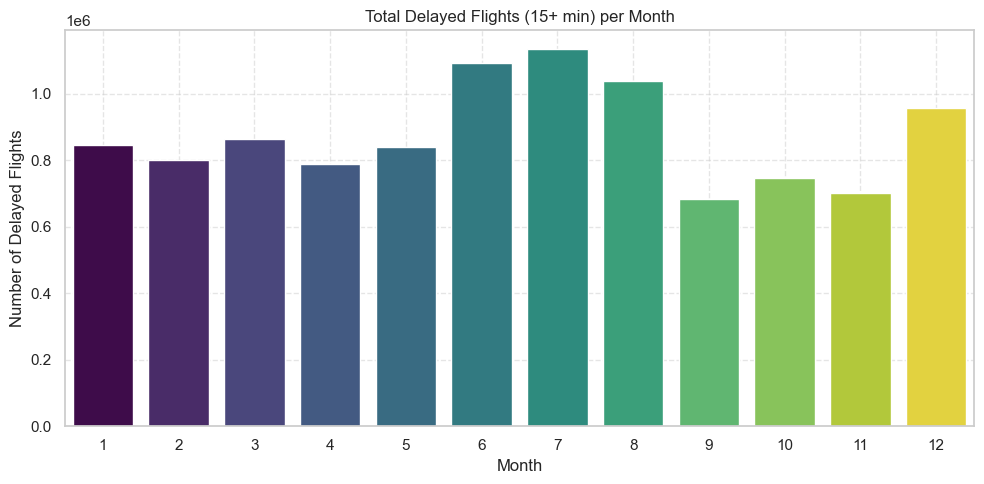

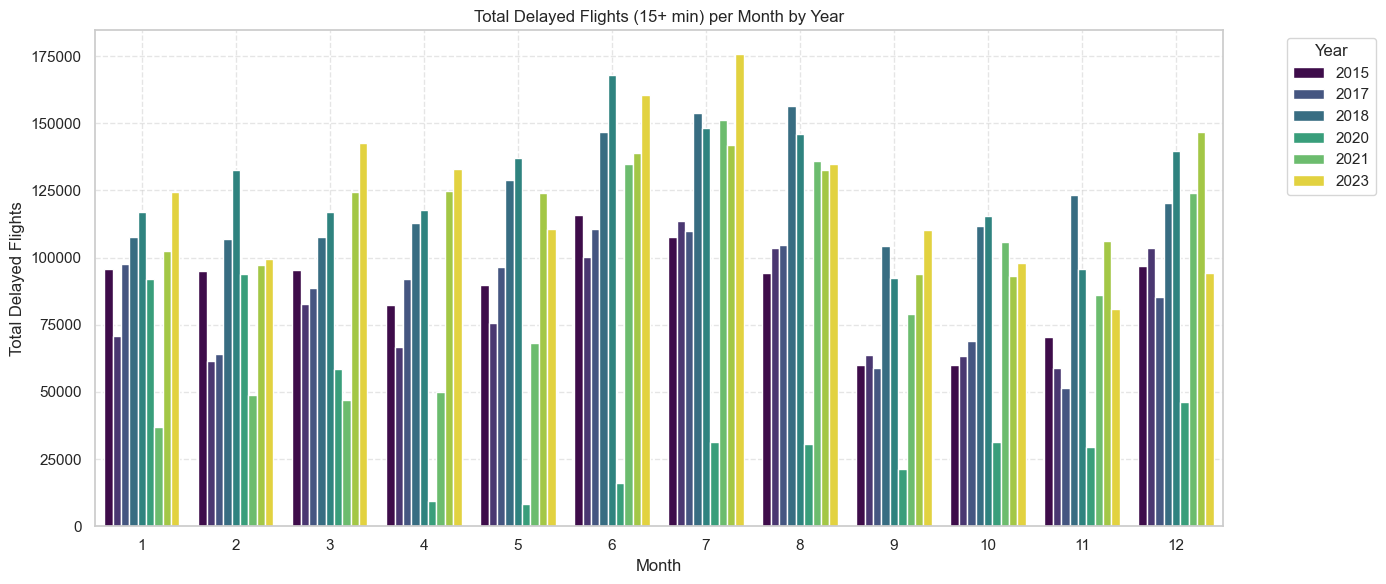

In [15]:
monthly_delay15 = df.groupby('month')['arr_del15'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_delay15, x='month', y='arr_del15', hue='month', palette='viridis', legend=False)
plt.title('Total Delayed Flights (15+ min) per Month')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

monthly_delay15_yearwise = df.groupby(['year', 'month'])['arr_del15'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_delay15_yearwise, x='month', y='arr_del15', hue='year', palette='viridis')
plt.title('Total Delayed Flights (15+ min) per Month by Year')
plt.xlabel('Month')
plt.ylabel('Total Delayed Flights')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




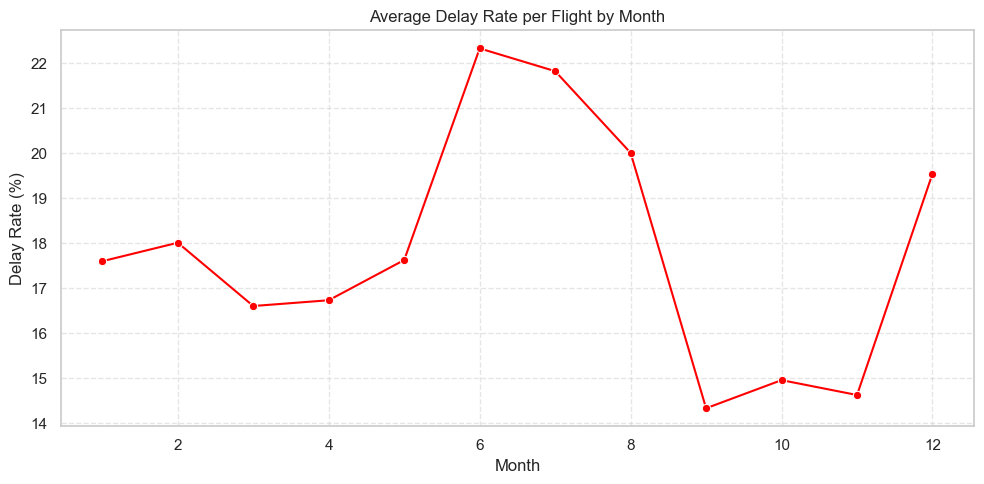

In [16]:
monthly_flights = df.groupby('month')['arr_flights'].sum()
monthly_delay15 = df.groupby('month')['arr_del15'].sum()
monthly_delay_rate = (monthly_delay15 / monthly_flights * 100).reset_index(name='delay_rate')

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_delay_rate, x='month', y='delay_rate', marker='o', color='red')
plt.title('Average Delay Rate per Flight by Month')
plt.xlabel('Month')
plt.ylabel('Delay Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


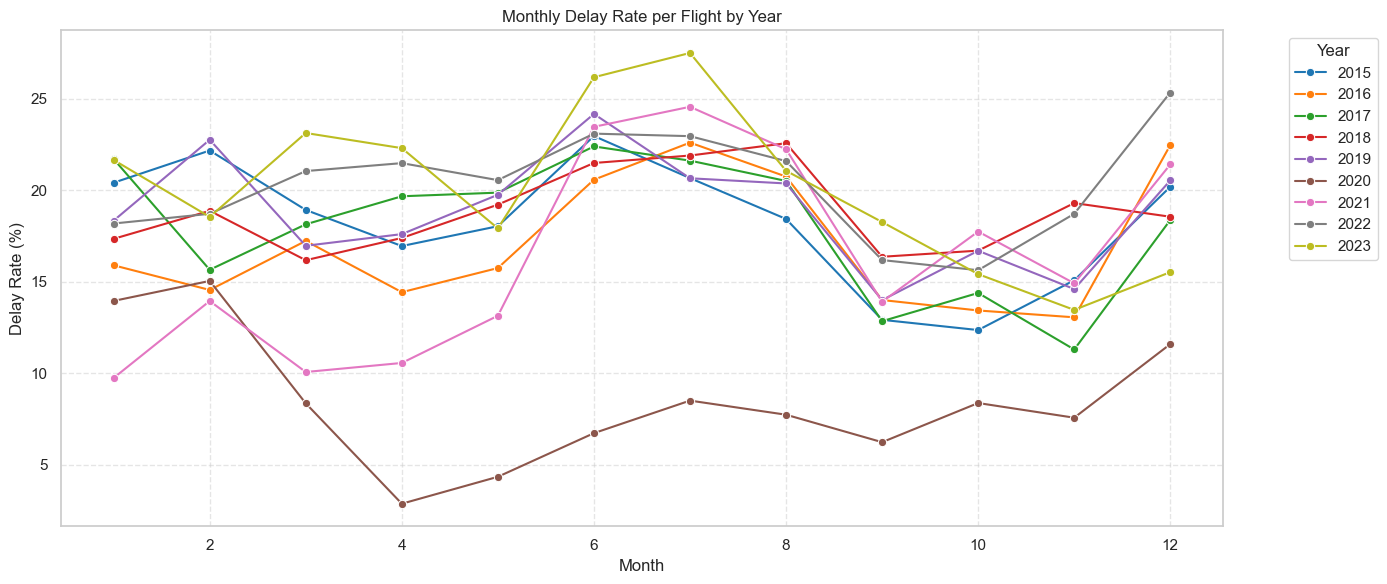

In [17]:
monthly_data = df.groupby(['year', 'month'])[['arr_flights', 'arr_del15']].sum().reset_index()
monthly_data['delay_rate'] = (monthly_data['arr_del15'] / monthly_data['arr_flights']) * 100

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_data, x='month', y='delay_rate', hue='year', marker='o', palette='tab10')
plt.title('Monthly Delay Rate per Flight by Year')
plt.xlabel('Month')
plt.ylabel('Delay Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

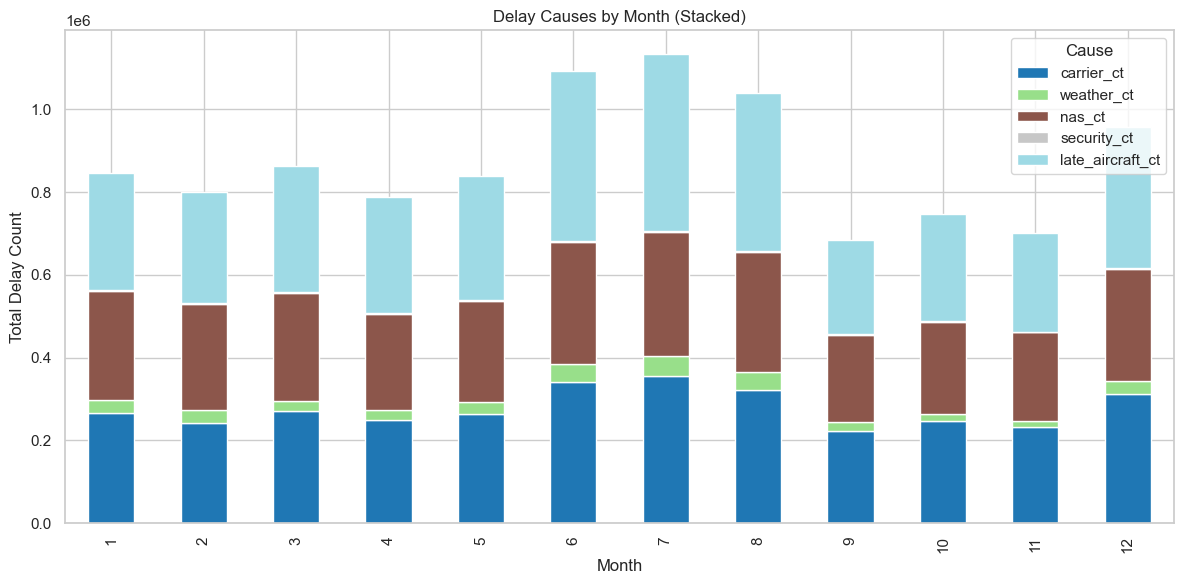

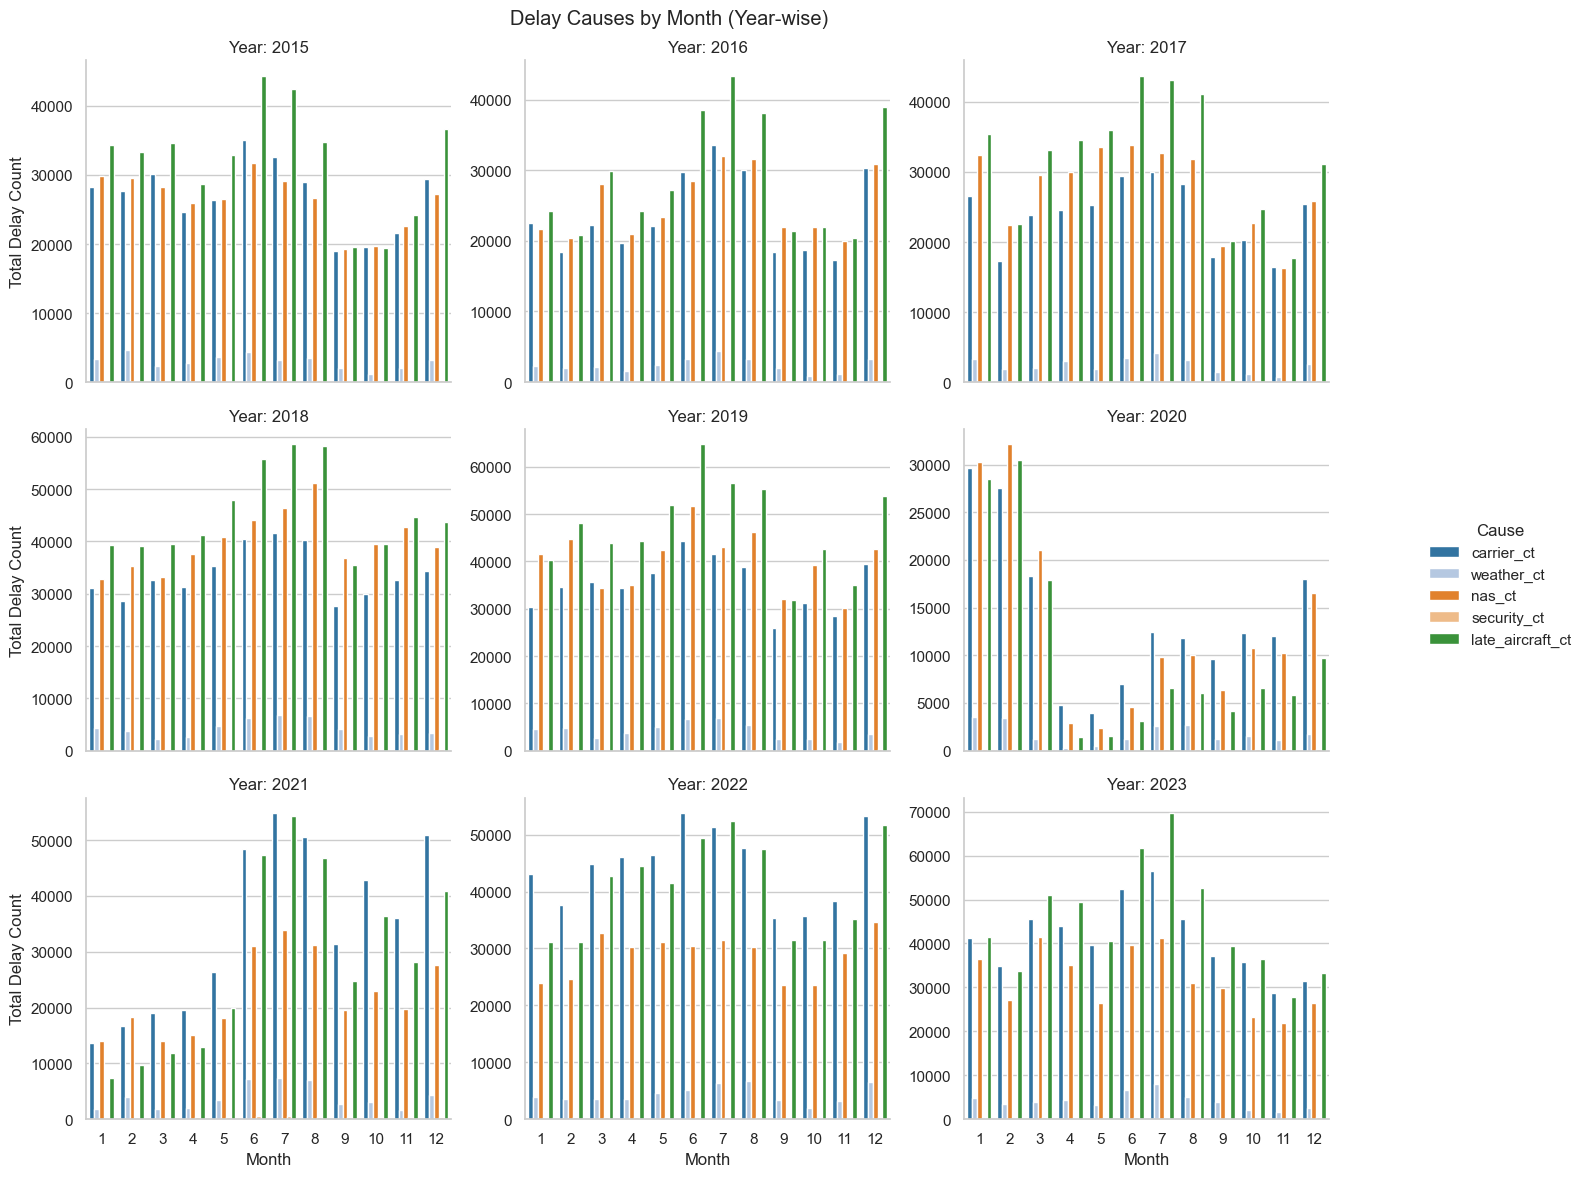

In [18]:
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
monthly_causes = df.groupby('month')[delay_causes].sum()
monthly_causes.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Delay Causes by Month (Stacked)')
plt.xlabel('Month')
plt.ylabel('Total Delay Count')
plt.legend(title='Cause')
plt.tight_layout()
plt.show()

delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
monthly_cause_by_year = df.groupby(['year', 'month'])[delay_causes].sum().reset_index()

df_melted = monthly_cause_by_year.melt(id_vars=['year', 'month'], value_vars=delay_causes,
                                        var_name='cause', value_name='count')

g = sns.FacetGrid(df_melted, col="year", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='month', y='count', hue='cause', palette='tab20')
g.set_axis_labels("Month", "Total Delay Count")
g.set_titles("Year: {col_name}")
g.add_legend(title="Cause", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Delay Causes by Month (Year-wise)')
plt.tight_layout()
plt.show()


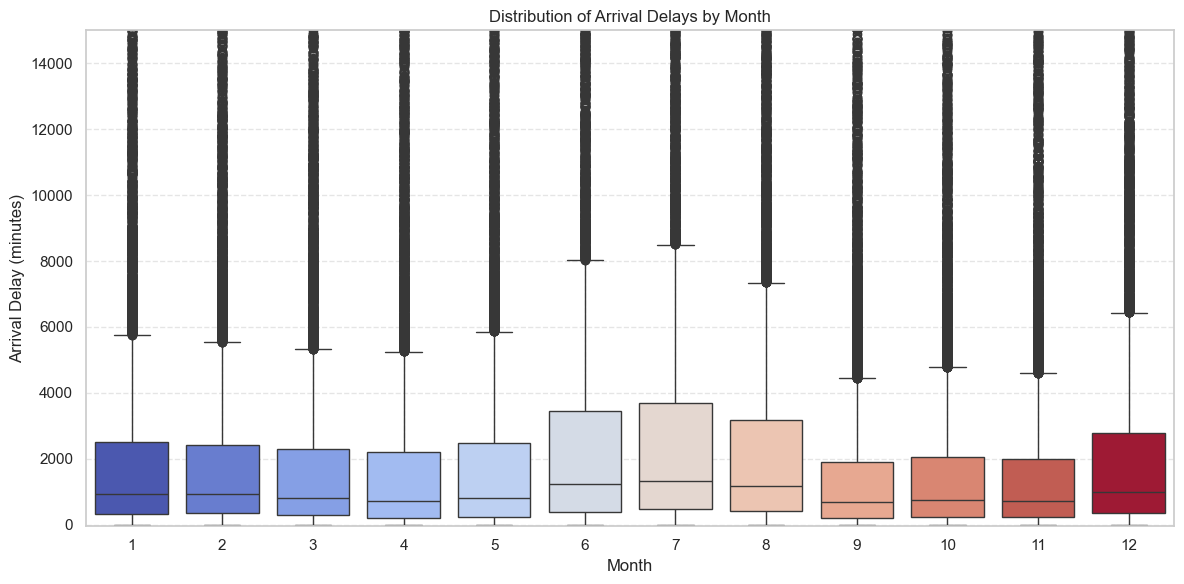

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='arr_delay', palette='coolwarm', hue='month', legend=False)
plt.ylim(-50, 15000)
plt.title('Distribution of Arrival Delays by Month')
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
df['is_peak_summer'] = df['month'].isin([6, 7]).astype(int)
df['is_holiday_season'] = (df['month'] == 12).astype(int)
df['is_low_risk_fall'] = df['month'].isin([9, 10]).astype(int)

import calendar
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])


In [21]:
carrier_mapping = df[['carrier', 'carrier_name']].drop_duplicates().sort_values('carrier')

print("Unique carrier-code to name mappings:")
print(carrier_mapping)

num_unique_carriers = df['carrier'].nunique()
print(f"\nTotal number of unique carriers: {num_unique_carriers}")

conflicts = df.groupby('carrier')['carrier_name'].nunique().reset_index()
conflicts = conflicts[conflicts['carrier_name'] > 1]

print("\nCarriers with conflicting names (if any):")
print(conflicts)


Unique carrier-code to name mappings:
       carrier                               carrier_name
0           9E                          Endeavor Air Inc.
130945      9K                                   Cape Air
110         AA                  American Airlines Network
141075      AA                     American Airlines Inc.
141175      AS                       Alaska Airlines Inc.
511         AS                    Alaska Airlines Network
82817       AX                      Trans States Airlines
950         B6                            JetBlue Airways
26759       C5  Commutair Aka Champlain Enterprises, Inc.
1569        C5              CommuteAir LLC dba CommuteAir
82926       CP                           Compass Airlines
522         DL                    Delta Air Lines Network
141307      DL                       Delta Air Lines Inc.
67081       EM                       Empire Airlines Inc.
110827      EV                   ExpressJet Airlines Inc.
74047       EV                    

In [22]:
df.drop(['carrier_name'],axis = 1,inplace = True)

In [23]:
carrier_counts = df['carrier'].value_counts().sort_values(ascending=False)
print("Flight count per carrier:\n", carrier_counts)

Flight count per carrier:
 carrier
OO    23771
DL    14937
MQ    11282
AA    10911
UA    10407
WN    10051
EV     8766
G4     8760
F9     8305
AS     7753
9E     7469
YV     6843
B6     6827
OH     6543
YX     6052
NK     4950
ZW     4444
PT     4155
G7     3922
C5     3409
QX     3200
HA     1952
AX     1909
CP      923
VX      819
US      434
EM      144
KS       44
9K       15
Name: count, dtype: int64


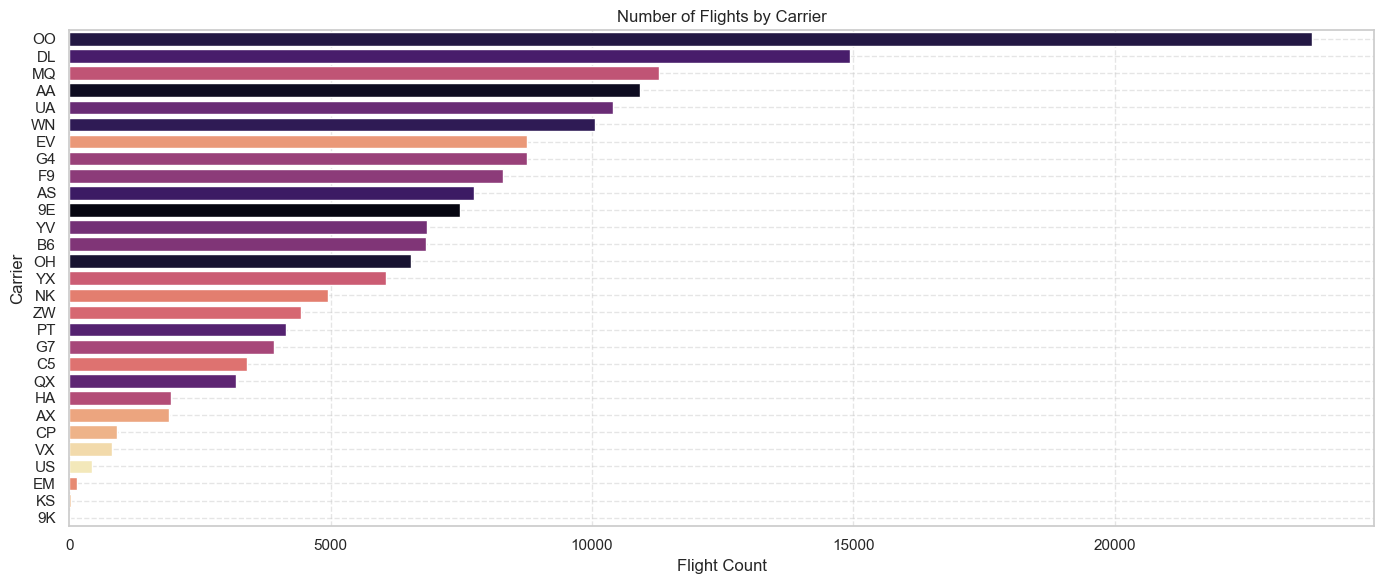

In [24]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='carrier', hue='carrier', order=carrier_counts.index, palette='magma', legend=False)

plt.title('Number of Flights by Carrier')
plt.xlabel('Flight Count')
plt.ylabel('Carrier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

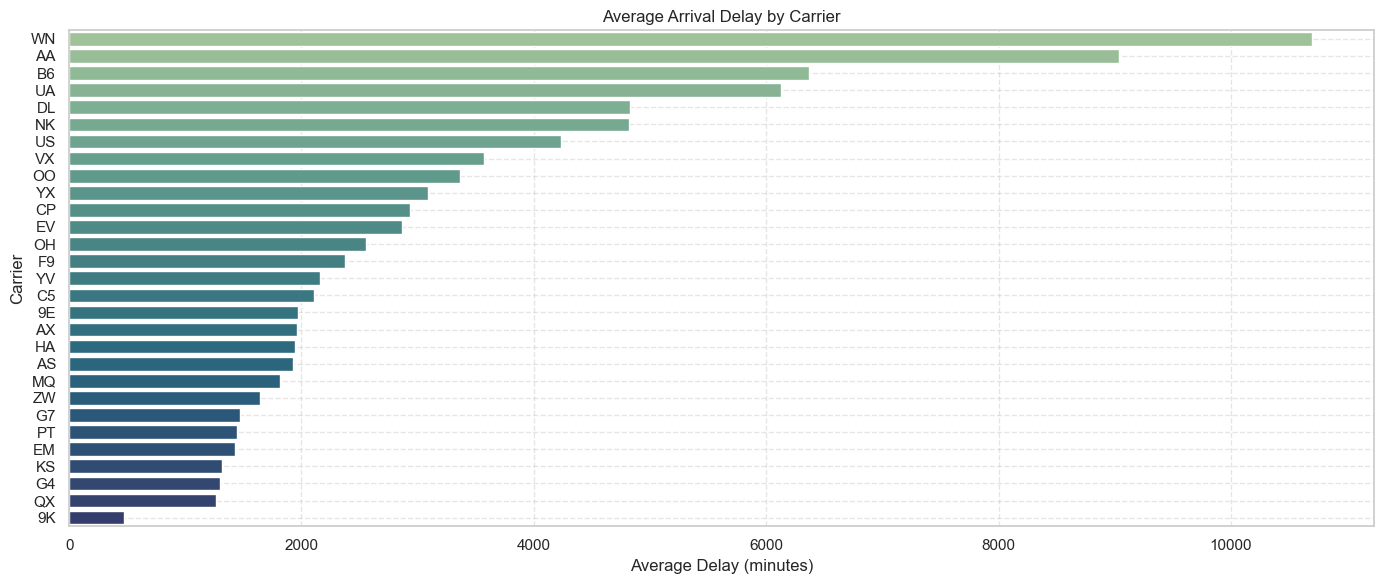

In [25]:
avg_delay = df.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=avg_delay.values, y=avg_delay.index, hue=avg_delay.index, palette='crest', legend=False)

plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Carrier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


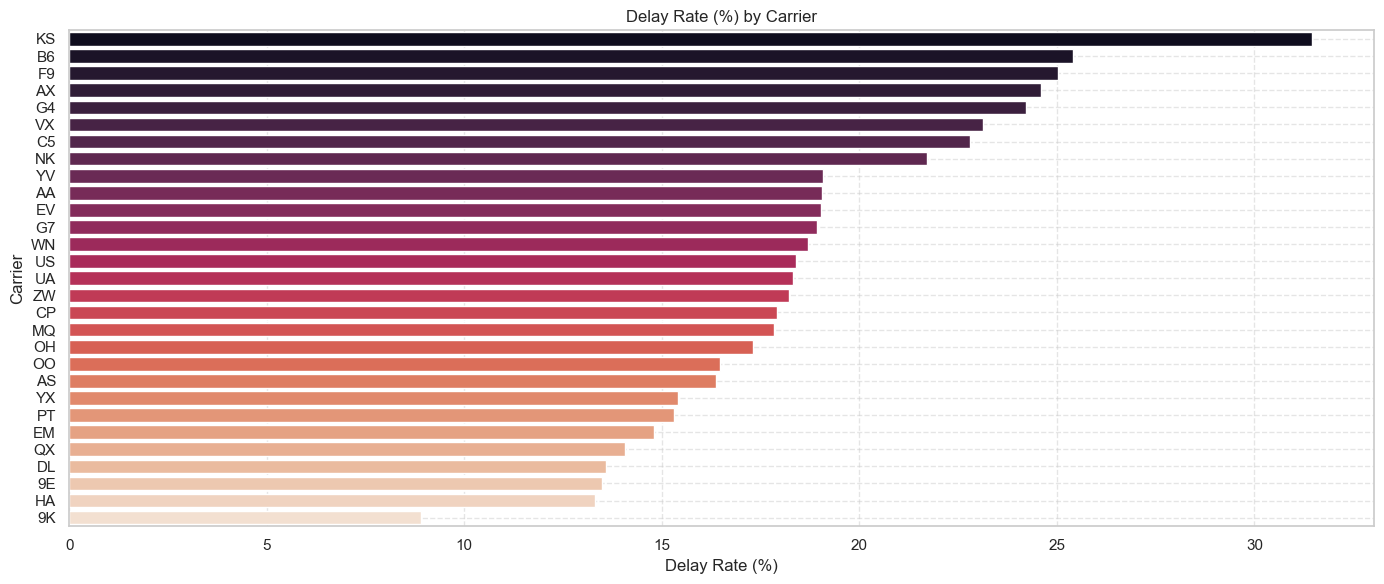

In [26]:
carrier_flights = df.groupby('carrier')['arr_flights'].sum()
carrier_delays = df.groupby('carrier')['arr_del15'].sum()
delay_rate = (carrier_delays / carrier_flights * 100).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=delay_rate.values, y=delay_rate.index, hue=delay_rate.index, palette='rocket', legend=False)

plt.title('Delay Rate (%) by Carrier')
plt.xlabel('Delay Rate (%)')
plt.ylabel('Carrier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


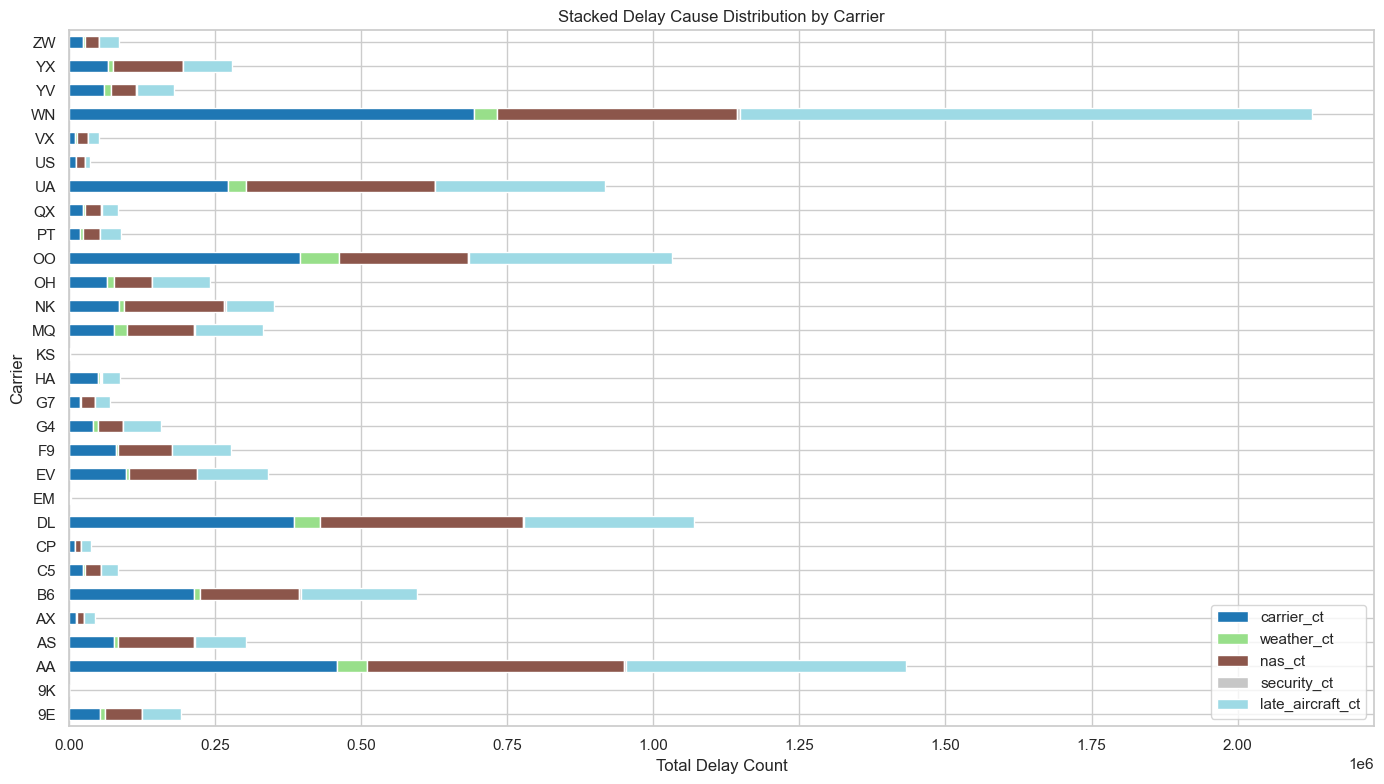

In [27]:
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
carrier_causes = df.groupby('carrier')[delay_causes].sum()

carrier_causes.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Stacked Delay Cause Distribution by Carrier')
plt.xlabel('Total Delay Count')
plt.ylabel('Carrier')
plt.tight_layout()
plt.show()


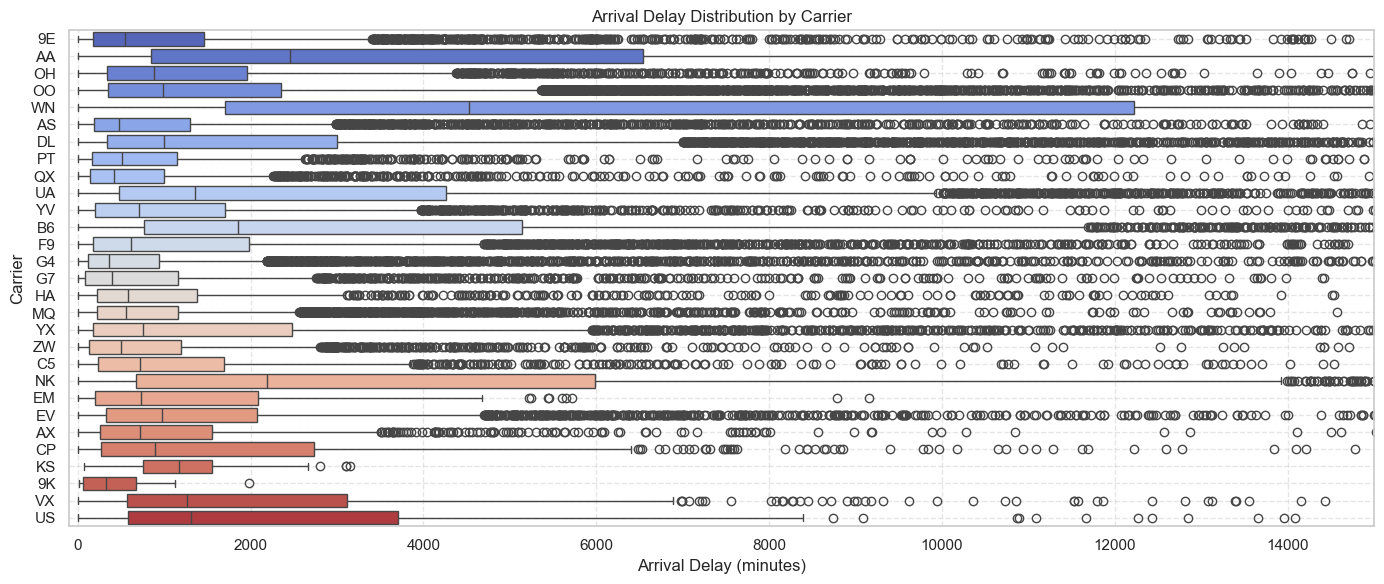

In [28]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='arr_delay', y='carrier', hue='carrier', palette='coolwarm', legend=False)

plt.xlim(-100, 15000)  
plt.title('Arrival Delay Distribution by Carrier')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Carrier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


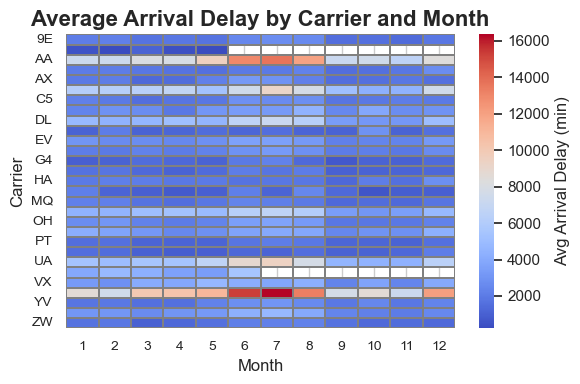

In [29]:
heatmap_data = df.groupby(['carrier', 'month'])['arr_delay'].mean().unstack()

plt.figure(figsize=(6, 4))
sns.set(style='whitegrid')

# Create heatmap
sns.heatmap(
    heatmap_data,
    annot=False,         
    fmt=".1f",            
    cmap="coolwarm",   
    linewidths=0.3,       
    linecolor='gray',
    cbar_kws={'label': 'Avg Arrival Delay (min)'}
)

plt.title('Average Arrival Delay by Carrier and Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Carrier', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.box(False)
plt.show()


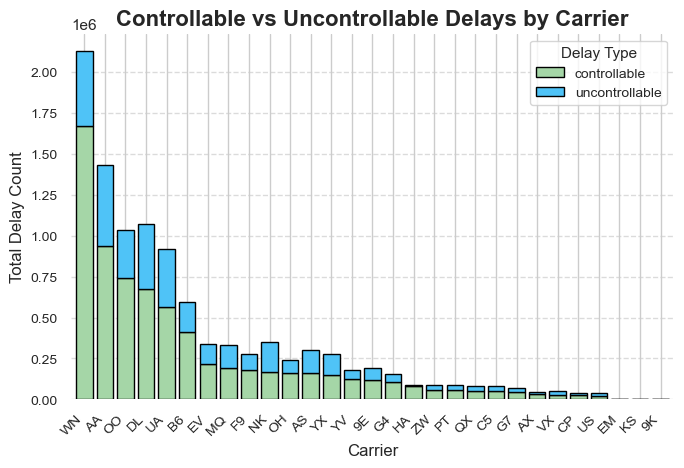

In [30]:
controllable = df.groupby('carrier')[['carrier_ct', 'late_aircraft_ct']].sum().sum(axis=1)
uncontrollable = df.groupby('carrier')[['weather_ct', 'nas_ct', 'security_ct']].sum().sum(axis=1)
carrier_delay_type = pd.DataFrame({
    'controllable': controllable,
    'uncontrollable': uncontrollable
})

carrier_delay_type = carrier_delay_type.sort_values(by='controllable', ascending=False)

ax = carrier_delay_type.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    width=0.8,
    color=['#a5d6a7','#4fc3f7' ], 
    edgecolor='black'
)

plt.title('Controllable vs Uncontrollable Delays by Carrier', fontsize=16, fontweight='bold')
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('Total Delay Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Delay Type', title_fontsize=11, fontsize=10, loc='upper right')
plt.box(False)
plt.tight_layout()

plt.show()


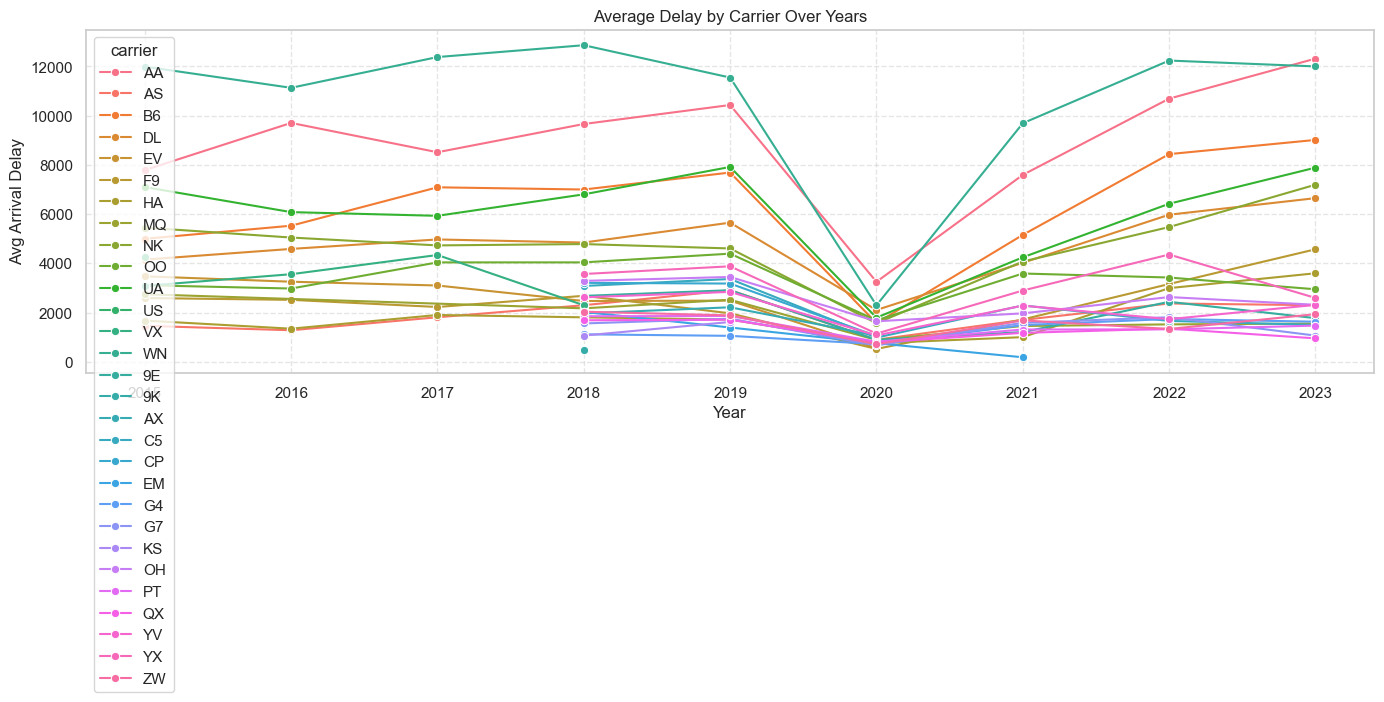

In [31]:
carrier_year_trend = df.groupby(['year', 'carrier'])['arr_delay'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=carrier_year_trend, x='year', y='arr_delay', hue='carrier', marker='o')
plt.title('Average Delay by Carrier Over Years')
plt.xlabel('Year')
plt.ylabel('Avg Arrival Delay')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


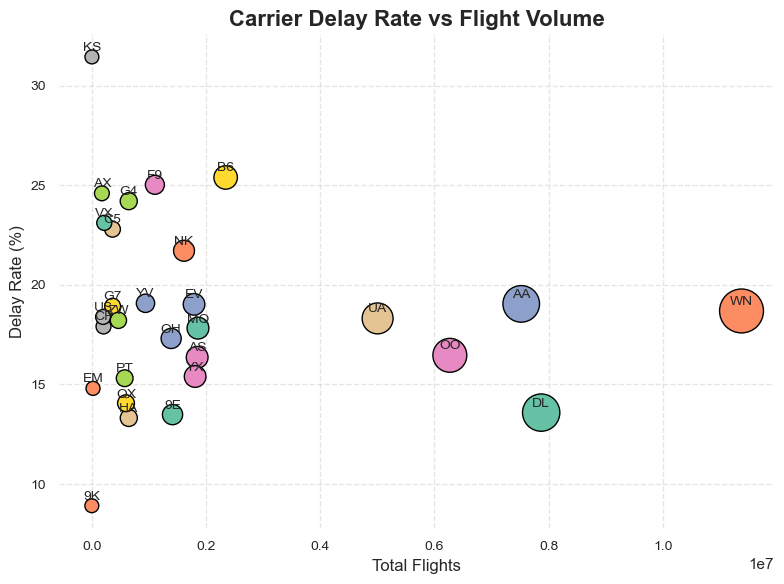

In [32]:

carrier_volume = df.groupby('carrier')[['arr_flights', 'arr_del15']].sum()
carrier_volume['delay_rate'] = (carrier_volume['arr_del15'] / carrier_volume['arr_flights']) * 100


plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')

scatter = sns.scatterplot(
    data=carrier_volume,
    x='arr_flights',
    y='delay_rate',
    size='arr_flights',
    hue=carrier_volume.index,
    sizes=(100, 1000),
    palette='Set2',
    legend=False,
    edgecolor='black',
    linewidth=1
)


for carrier, row in carrier_volume.iterrows():
    plt.text(
        row['arr_flights'],
        row['delay_rate'] + 0.3, 
        carrier,
        fontsize=10,
        ha='center'
    )

plt.title('Carrier Delay Rate vs Flight Volume', fontsize=16, fontweight='bold')
plt.xlabel('Total Flights', fontsize=12)
plt.ylabel('Delay Rate (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.box(False)
plt.tight_layout()
plt.show()


In [33]:
df['dominant_delay_cause'] = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].idxmax(axis=1)

delay_threshold = df['arr_delay'].quantile(0.90)
df['delay_outlier_flag'] = (df['arr_delay'] > delay_threshold).astype(int)

carrier_counts = df['carrier'].value_counts()
quantiles = carrier_counts.quantile([0.33, 0.66])
def volume_tier(carrier):
    count = carrier_counts[carrier]
    if count <= quantiles[0.33]:
        return 'low'
    elif count <= quantiles[0.66]:
        return 'medium'
    else:
        return 'high'
df['flight_volume_tier'] = df['carrier'].apply(volume_tier)

iqr_df = df.groupby('carrier')['arr_delay'].quantile([0.75, 0.25]).unstack()
iqr_df['delay_iqr'] = iqr_df[0.75] - iqr_df[0.25]
df = df.merge(iqr_df['delay_iqr'], on='carrier', how='left')



In [34]:
df['controllable_delay_ct'] = df['carrier_ct'] + df['late_aircraft_ct']
df['total_delay_causes_ct'] = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum(axis=1)
df['controllable_delay_ratio_ct'] = df['controllable_delay_ct'] / df['total_delay_causes_ct'].replace(0, np.nan)
df['controllable_delay_min'] = df['carrier_delay'] + df['late_aircraft_delay']
df['total_delay_causes_min'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)
df['controllable_delay_ratio_min'] = df['controllable_delay_min'] / df['total_delay_causes_min'].replace(0, np.nan)
df['controllable_delay_ratio_ct'] = df['controllable_delay_ratio_ct'].fillna(0)
df['controllable_delay_ratio_min'] = df['controllable_delay_ratio_min'].fillna(0)

In [35]:
airport_mapping = df[['airport', 'airport_name']].drop_duplicates().sort_values('airport')
print("Unique airport-code to name mappings:")
print(airport_mapping)

num_unique_airports = df['airport'].nunique()
print(f"\nTotal number of unique airports: {num_unique_airports}")

conflicts = df.groupby('airport')['airport_name'].nunique().reset_index()
conflicts = conflicts[conflicts['airport_name'] > 1]

print("\nAirports with conflicting names (if any):")
print(conflicts)



Unique airport-code to name mappings:
       airport                                       airport_name
0          ABE  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...
1280       ABI                      Abilene, TX: Abilene Regional
110        ABQ  Albuquerque, NM: Albuquerque International Sun...
205        ABR                    Aberdeen, SD: Aberdeen Regional
206        ABY             Albany, GA: Southwest Georgia Regional
...        ...                                                ...
664        XWA       Williston, ND: Williston Basin International
948        YAK                       Yakutat, AK: Yakutat Airport
772        YKM   Yakima, WA: Yakima Air Terminal/McAllister Field
139638     YNG  Youngstown/Warren, OH: Youngstown-Warren Regional
665        YUM             Yuma, AZ: Yuma MCAS/Yuma International

[417 rows x 2 columns]

Total number of unique airports: 393

Airports with conflicting names (if any):
    airport  airport_name
35      BFM             2
45      BLV  

In [36]:
df = df.drop(columns=['airport_name'])

In [37]:
airport_counts = df['airport'].value_counts().sort_values(ascending=False)

print("Flight count per airport:\n", airport_counts)
print("\nNumber of unique airports:", df['airport'].nunique())

Flight count per airport:
 airport
CLE    1591
DTW    1579
BNA    1549
PIT    1536
IND    1532
       ... 
ROP       5
CLD       4
CEC       4
YNG       1
FNL       1
Name: count, Length: 393, dtype: int64

Number of unique airports: 393


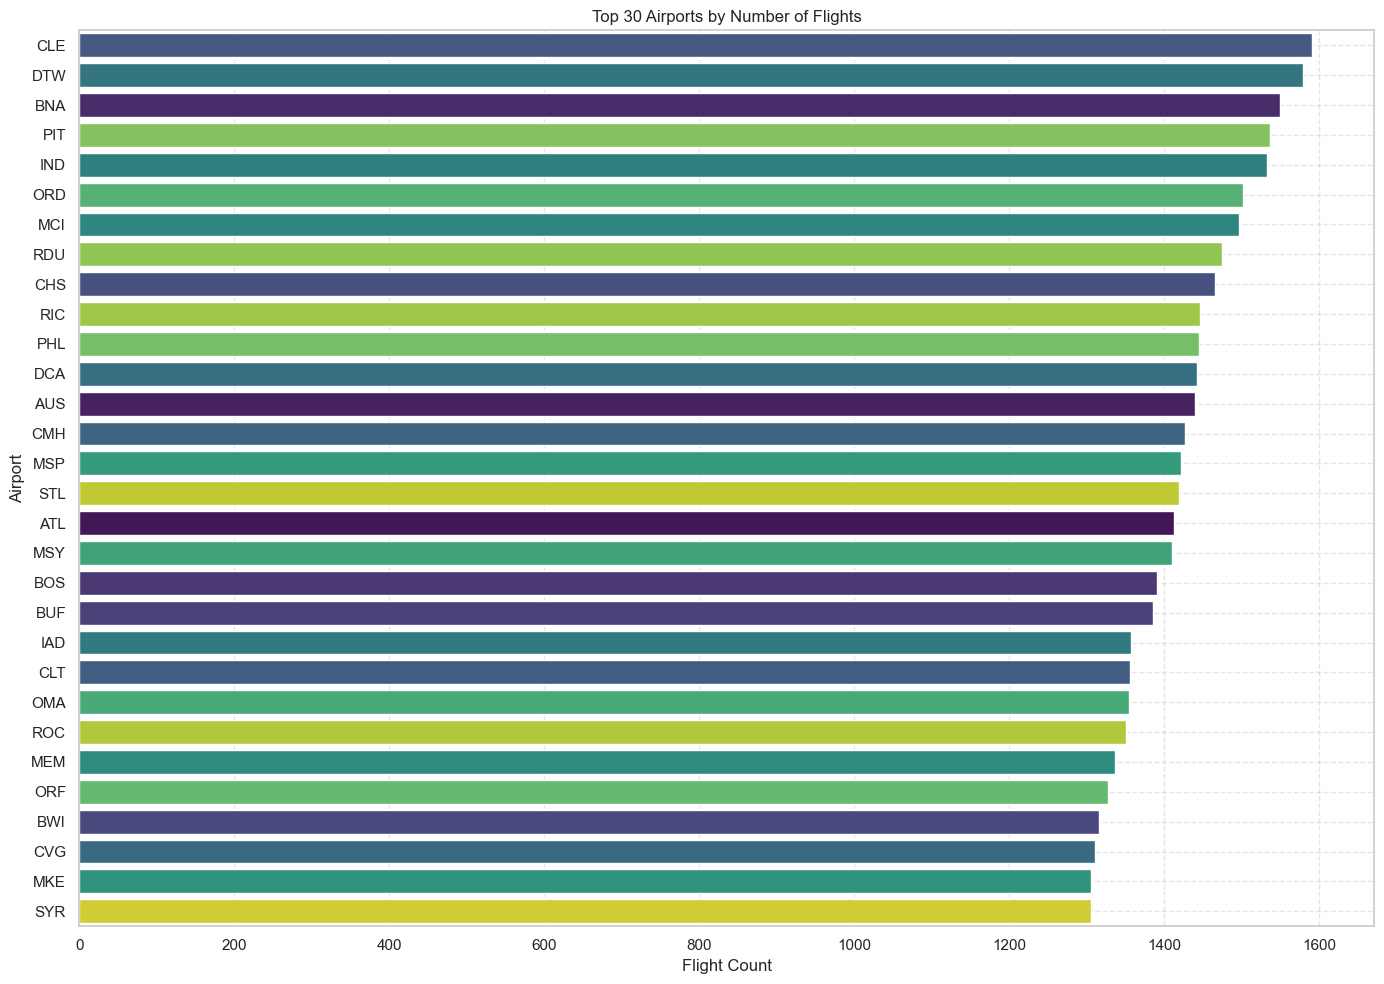

In [38]:
top_airports = df['airport'].value_counts().head(30).index

plt.figure(figsize=(14, 10))
sns.countplot(data=df[df['airport'].isin(top_airports)],
              y='airport', order=top_airports, palette='viridis',
              hue='airport', legend=False)
plt.title('Top 30 Airports by Number of Flights')
plt.xlabel('Flight Count')
plt.ylabel('Airport')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


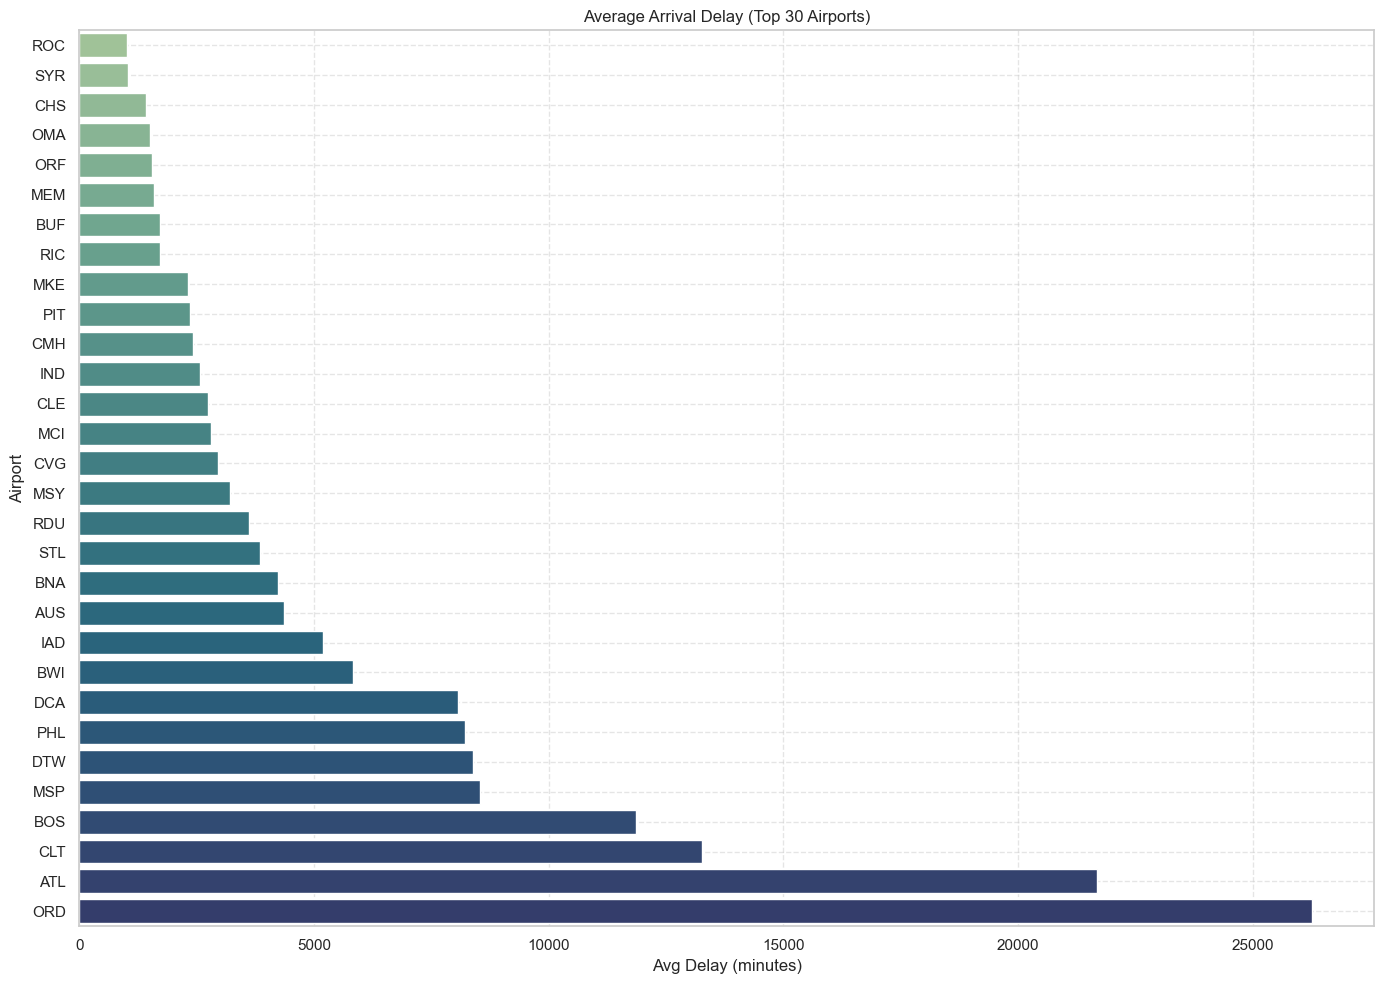

In [39]:
avg_delay_top = df[df['airport'].isin(top_airports)].groupby('airport')['arr_delay'].mean().sort_values()

plt.figure(figsize=(14, 10))
sns.barplot(x=avg_delay_top.values, y=avg_delay_top.index, hue=avg_delay_top.index, palette='crest', legend=False)
plt.title('Average Arrival Delay (Top 30 Airports)')
plt.xlabel('Avg Delay (minutes)')
plt.ylabel('Airport')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [40]:
airport_avg_delay = df.groupby('airport')['arr_delay'].mean().sort_values(ascending=False)

airport_delay_dict = airport_avg_delay.to_dict()

print("Top 10 Airports by Average Arrival Delay:")
for code, delay in list(airport_delay_dict.items())[:10]:
    print(f"{code}: {delay:.2f} min")

print("\nTop 10 Airports with Lowest Average Arrival Delay:")
for code, delay in list(airport_delay_dict.items())[-10:]:
    print(f"{code}: {delay:.2f} min")

airport_delay_df = pd.DataFrame(list(airport_delay_dict.items()), columns=['airport', 'avg_arr_delay'])
airport_delay_df_sorted = airport_delay_df.sort_values(by='avg_arr_delay', ascending=False)

Top 10 Airports by Average Arrival Delay:
ORD: 26264.23 min
DFW: 25774.71 min
ATL: 21681.52 min
DEN: 21058.62 min
JFK: 18694.83 min
SFO: 18284.37 min
SFB: 16881.68 min
LAX: 16790.23 min
EWR: 16693.61 min
MCO: 16109.84 min

Top 10 Airports with Lowest Average Arrival Delay:
PPG: 183.60 min
SPN: 153.71 min
GST: 131.27 min
YNG: 119.00 min
STC: 106.06 min
OWB: 102.13 min
OGD: 80.38 min
ADK: 65.81 min
ROP: 42.20 min
FNL: 0.00 min


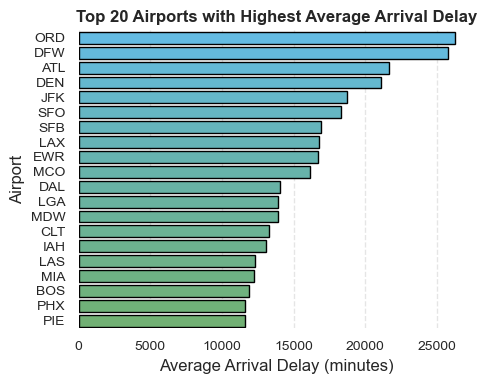

In [41]:
plt.figure(figsize=(5, 4))
sns.set(style='whitegrid')

colors = sns.color_palette("blend:#4fc3f7,#66bb6a", n_colors=20)

sns.barplot(
    data=airport_delay_df_sorted.head(20),
    x='avg_arr_delay',
    y='airport',
    hue = 'airport',
    palette=colors,
    edgecolor='black'
)

plt.title('Top 20 Airports with Highest Average Arrival Delay', fontsize=12, fontweight='bold')
plt.xlabel('Average Arrival Delay (minutes)', fontsize=12)
plt.ylabel('Airport', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.box(False)
plt.tight_layout()
plt.show()


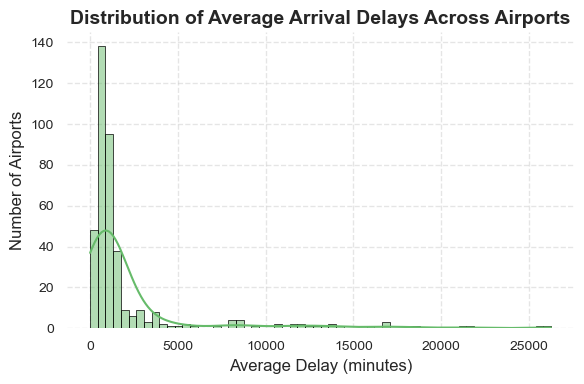

In [42]:
airport_delay_df = df.groupby('airport')['arr_delay'].mean().reset_index()
airport_delay_df.rename(columns={'arr_delay': 'avg_arr_delay'}, inplace=True)
plt.figure(figsize=(6, 4))
sns.set(style='whitegrid')

sns.histplot(
    airport_delay_df['avg_arr_delay'],
    bins=60,
    kde=True,
    color='#66bb6a',         
    edgecolor='black',
    linewidth=0.5
)
plt.title('Distribution of Average Arrival Delays Across Airports', fontsize=14, fontweight='bold')
plt.xlabel('Average Delay (minutes)', fontsize=12)
plt.ylabel('Number of Airports', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.box(False)
plt.tight_layout()
plt.show()

In [43]:
if not isinstance(airport_delay_dict, dict) or not airport_delay_dict:
    raise ValueError("airport_delay_dict must be a non-empty dictionary")

airport_delay_df = pd.DataFrame(
    list(airport_delay_dict.items()),
    columns=['airport', 'airport_avg_delay']
)

df = df.merge(airport_delay_df, on='airport', how='left')

unmatched_airports = df[df['airport_avg_delay'].isna()]['airport'].unique()
if len(unmatched_airports) > 0:
    print(f"⚠️ Warning: {len(unmatched_airports)} airports have no delay info. Sample:", unmatched_airports[:5])

def classify_delay_severity(delay):
    if delay >= 20000:
        return 'Severe'
    elif delay >= 10000:
        return 'Moderate'
    elif delay >= 3000:
        return 'Mild'
    else:
        return 'Low'

df['delay_severity_class'] = df['airport_avg_delay'].apply(classify_delay_severity)

top20_volume_airports = (
    df.groupby('airport')['arr_flights']
      .sum()
      .sort_values(ascending=False)
      .head(20)
      .index
)
df['is_high_volume_airport'] = df['airport'].isin(top20_volume_airports).astype(int)

airport_flight_volume = (
    df.groupby('airport')['arr_flights']
      .sum()
      .reset_index()
      .rename(columns={'arr_flights': 'total_flights'})
)
df = df.merge(airport_flight_volume, on='airport', how='left')

df['volume_delay_ratio'] = df['airport_avg_delay'] / (df['total_flights'] + 1e-6)

low_delay_airports = (
    airport_delay_df
    .sort_values(by='airport_avg_delay')
    .head(20)['airport']
)
df['is_low_delay_airport'] = df['airport'].isin(low_delay_airports).astype(int)


In [44]:
categorical_cols = [
    'carrier', 'airport', 'dominant_delay_cause',
    'flight_volume_tier', 'delay_severity_class'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

binary_cols = [
    'is_peak_summer', 'is_holiday_season', 'is_low_risk_fall',
    'delay_outlier_flag', 'is_high_volume_airport', 'is_low_delay_airport'
]
for col in binary_cols:
    df[col] = df[col].astype('int8')
df.drop(['total_delay_causes_ct','total_delay_causes_min'],axis = 1,inplace = True)

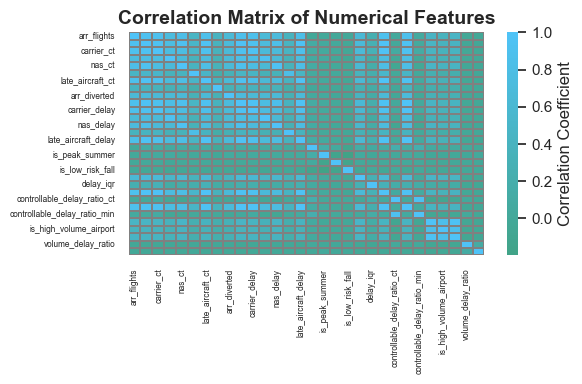

In [45]:
from matplotlib.colors import LinearSegmentedColormap

numeric_cols = df.select_dtypes('number').columns.drop(['year', 'month'])
corr = df[numeric_cols].corr()
green_blue_cmap = LinearSegmentedColormap.from_list("green_blue", ['#388e3c', '#4fc3f7'])

plt.figure(figsize=(6, 4))
sns.set(style='white')

sns.heatmap(
    corr,
    cmap=green_blue_cmap,
    center=0,
    annot=False,           
    fmt=".2f",
    linewidths=0.3,
    linecolor='gray',
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=6, ha='center')
plt.yticks(rotation=0, fontsize=6)
plt.tight_layout()
plt.box(False)
plt.show()


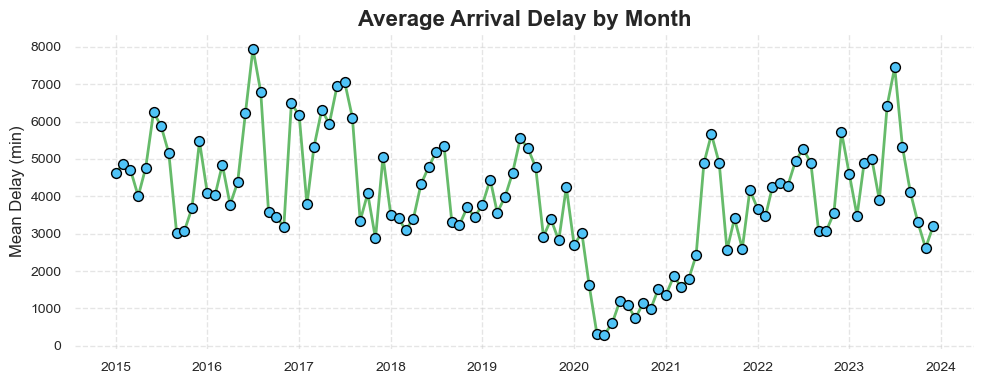

In [46]:
df['year_month'] = pd.to_datetime(df.assign(day=1)[['year', 'month', 'day']])
monthly = df.groupby('year_month')['arr_delay'].mean()

plt.figure(figsize=(10, 4))
sns.set(style='whitegrid')

plt.plot(
    monthly.index,
    monthly.values,
    color='#66bb6a',     
    linewidth=2
)
plt.scatter(
    monthly.index,
    monthly.values,
    color='#4fc3f7',      
    edgecolor='black',
    s=50,
    zorder=5
)

plt.title('Average Arrival Delay by Month', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Mean Delay (min)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.box(False)
plt.tight_layout()

plt.show()


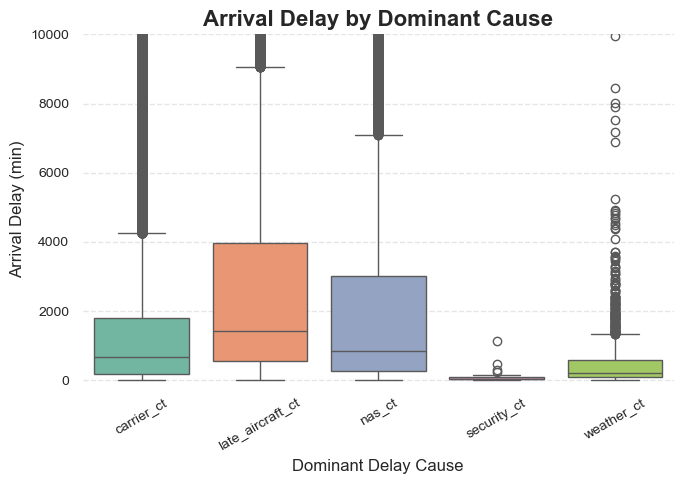

In [50]:
if 'dominant_delay_cause' not in df.columns:
    delay_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
    df['dominant_delay_cause'] = df[delay_cols].idxmax(axis=1)

plt.figure(figsize=(7, 5))
sns.set(style='whitegrid')

sns.boxplot(
    data=df,
    x='dominant_delay_cause',
    y='arr_delay',
    palette='Set2',
    linewidth=1,
    hue = 'dominant_delay_cause'
)

plt.ylim(-100, 10000)
plt.title('Arrival Delay by Dominant Cause', fontsize=16, fontweight='bold')
plt.xlabel('Dominant Delay Cause', fontsize=12)
plt.ylabel('Arrival Delay (min)', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.box(False)
plt.tight_layout()
plt.show()